# Palmer Penguins 

This notebook contains my analysis of the palmer penguins data set.

In [30]:
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Make sure data is loaded correctly
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We must first clean the dataframe before beginning analysis to ensure results are accurate. Replace null values using fillna and convert certain columns to Categories for memory efficiency.

In [38]:
# Use fillna function to account for null values

penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(0)
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(0)
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(0)
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(0)
penguins['sex'] = penguins['sex'].fillna('unknown')
penguins['species'] = penguins['species'].fillna('unknown')
penguins['island'] = penguins['island'].fillna('unknown')
penguins['year'] = penguins['year'].fillna('unknown')

# Use .head() to ensure null values have been updated correctly
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,unknown,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [32]:
# Convert to categories

penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')
penguins['year'] = penguins['year'].astype('category')


We next look at how many penguins there are across all species. After this we see the breakdown of penguins by species, island and sex.

In [57]:
# Get the total number of penguins

penguin_sum = penguins['species'].value_counts().sum()

# Use value_counts to see the breakdown of species, islands and sex

species_percentage = penguins['species'].value_counts(normalize = True)*100
#Convert new varibale to string so we can add '%'
species_rounded = species_percentage.round().astype(str)+'%'

island_percentage = penguins['island'].value_counts(normalize=True)*100
island_rounded = island_percentage.round().astype(str)+'%'

sex_percentage = penguins['sex'].value_counts(normalize=True)*100
sex_rounded = sex_percentage.round().astype(str)+'%' 

print(f"The total number of penguins is {penguin_sum}, here's a breakdown by species, island and sex:" )
print(species_rounded)

print(island_rounded)

print(sex_rounded)

The total number of penguins is 344, here's a breakdown by species, island and sex:
species
Adelie       44.0%
Gentoo       36.0%
Chinstrap    20.0%
Name: proportion, dtype: object
island
Biscoe       49.0%
Dream        36.0%
Torgersen    15.0%
Name: proportion, dtype: object
sex
male       49.0%
female     48.0%
unknown     3.0%
Name: proportion, dtype: object


# Penguin Distribution 

Among the three species within our dataset, Adelie penguins are the only penguins we see in all three of the islands. This distribution suggests that Adelie penguins are more adaptable when it comes to environmental conditions.

The fact that all Chinstrap penguins are observed exclusively on the island Dream, while all Gentoo penguins inhabit Biscoe Island, further emphasizes the specialization of these species to specific habitats.

Adelie penguins on average are smaller species compared to Chinstrap and Gentoo which likely works in their favour when it comes to adaptobility in different environments.

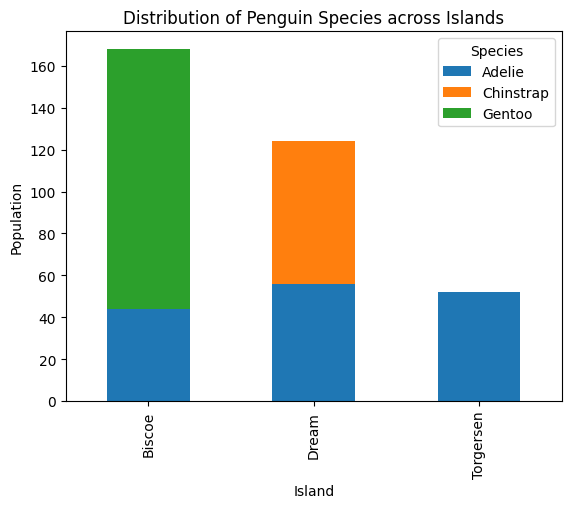

In [59]:
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

# Load the Palmer Penguin dataset
penguins = load_penguins()

# Aggregate the data to count the occurrences of each species on each island
species_island_counts = penguins.groupby(['island', 'species']).size().unstack(fill_value=0)

# Plot the stacked bar chart
species_island_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Island")
plt.ylabel("Population")
plt.title("Distribution of Penguin Species across Islands")

# Show the plot
plt.legend(title='Species')
plt.show()



The results from below show that on average Gentoo have the highest body mass and flipper length while Chinstrap on average have bigger bill depth and length.

When it comes to Gentoo penguins they utilise their large flippers making '450 dives per day to forage for food' (https://oceanwide-expeditions.com/to-do/wildlife/gentoo-penguin).

On average, Males tend to be larger than Females across all variables. The results of this analysis indicates potential relationships to explore.

In [96]:
# Use Pandas Groupby function to get the min and max body mass for each penguin

import pandas as pd
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Use GroupBy Function to Group different variables together 
min_max_mean_body_mass = penguins.groupby('species')['body_mass_g'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_bill_length_mm = penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_bill_depth_mm = penguins.groupby('species')['bill_depth_mm'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_flipper_length_mm = penguins.groupby('species')['flipper_length_mm'].agg(['min', 'max', 'mean']).round(1)

print(f"Body Mass Breakdown: \n {min_max_mean_body_mass}")
print(f"Bill Length Breakdown: \n {min_max_mean_bill_length_mm}")
print(f"Bill Depth Breakdown \n {min_max_mean_bill_depth_mm}")
print(f"Flipper Length Breakdown: \n {min_max_mean_flipper_length_mm}")

Body Mass Breakdown: 
               min     max    mean
species                          
Adelie     2850.0  4775.0  3700.7
Chinstrap  2700.0  4800.0  3733.1
Gentoo     3950.0  6300.0  5076.0
Bill Length Breakdown: 
             min   max  mean
species                    
Adelie     32.1  46.0  38.8
Chinstrap  40.9  58.0  48.8
Gentoo     40.9  59.6  47.5
Bill Depth Breakdown 
             min   max  mean
species                    
Adelie     15.5  21.5  18.3
Chinstrap  16.4  20.8  18.4
Gentoo     13.1  17.3  15.0
Flipper Length Breakdown: 
              min    max   mean
species                       
Adelie     172.0  210.0  190.0
Chinstrap  178.0  212.0  195.8
Gentoo     203.0  231.0  217.2


In [72]:
# Use groupby and .mean functions to see on average what sex is bigger across variables

flipper_sex = penguins.groupby(['species','sex'])['flipper_length_mm'].mean().round()
body_mass_sex = penguins.groupby(['species','sex'])['body_mass_g'].mean().round()
bill_d_sex = penguins.groupby(['species','sex'])['bill_depth_mm'].mean().round()
bill_l_sex = penguins.groupby(['species','sex'])['bill_length_mm'].mean().round()

#print(body_mass_sex)
#print(flipper_sex)
#print(bill_d_sex)
#print(bill_l_sex)


https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

The results of the Histogram show that.......

In [132]:
import pandas as pd
from palmerpenguins import load_penguins

# Load penguins data
penguins = load_penguins()

# Select the 'body_mass_g' variable
body_mass = penguins['body_mass_g']

# Count the frequency of each body mass value
body_mass_counts = body_mass.value_counts()

# Print the top 5 most frequent body masses
print("Top 5 most frequent body masses:")
print(body_mass_counts.head(5))


Top 5 most frequent body masses:
body_mass_g
3800.0    12
3700.0    11
3950.0    10
3900.0    10
3550.0     9
Name: count, dtype: int64


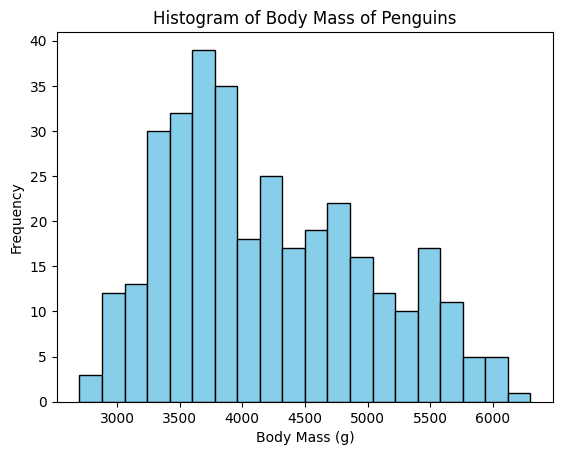

In [28]:
import pandas as pd
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

# Load penguins data
penguins = load_penguins()

# Select the 'body_mass_g' variable
body_mass = penguins['body_mass_g']

# Create the histogram - Bins is the number of intervals in the histogram 
plt.hist(body_mass, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Body Mass of Penguins')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Pearson Correlation Coefficient

https://seaborn.pydata.org/tutorial/introduction.html

The correlation coefficient of flipper length and body mass culculated using Pearson's correlation method is 0.87. This indicates that there is a strong relationship between flipper length and body mass meaning that as flipper length increases, body mass tends to do the same.

The scatter plot is used to further visualise the relationship between the two variables.

Other correlation methods include Spearman's rank correlation for assessing monotonic relationships and Kendall's tau for measuring ordinal associations. However, Pearson's correlation is ideal when exploring linear relationships.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/#:~:text=There%20are%20two%20main%20types,types%20of%20variables%20being%20studied.

Correlation coefficient:0.87


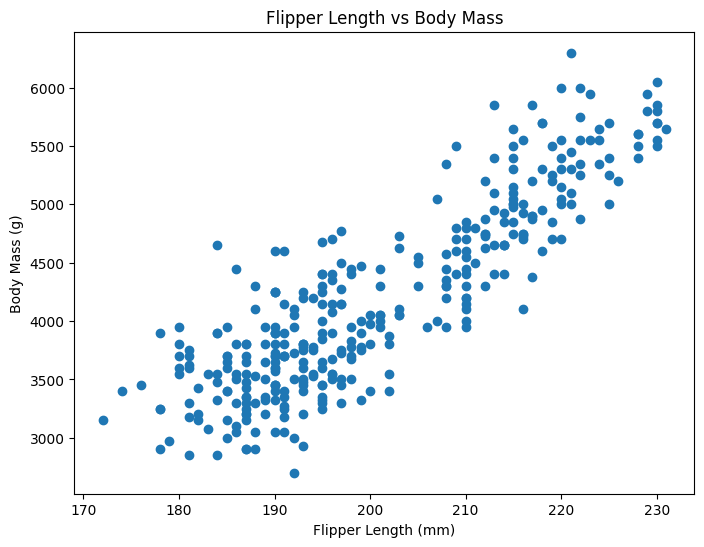

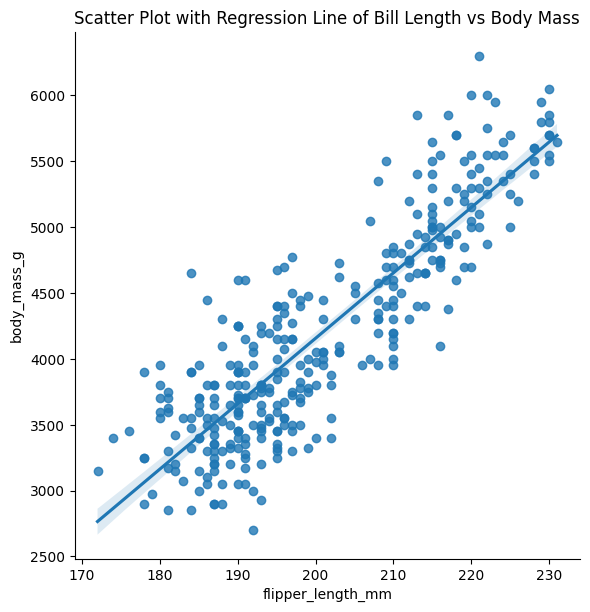

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Compute correlation - .corr automatiaclly applies Pearson's theory
correlation = penguins['flipper_length_mm'].corr(penguins['body_mass_g']).round(2)
print(f"Correlation coefficient:{correlation}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

# Seaborn scatter plot with regression line
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins, height=6)
plt.title('Scatter Plot with Regression Line of Bill Length vs Body Mass')
plt.show()

To showcase visually what a moderate relationship looks like we can examine the relationship between Flipper Length and Bill Depth.

The correlation coefficient is -0.58 meaning there is a moderate negative relationship. With a negative relationship it indicates that as the flipper length increases the bill depth decreases. While this isn't a strong relationship -0.58 is strong enough that it shouldn't be disregarded.

Correlation Coefficient: -0.58


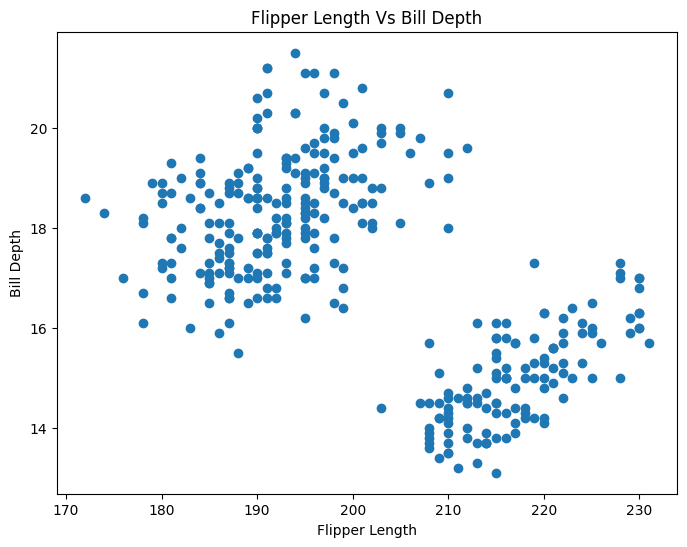

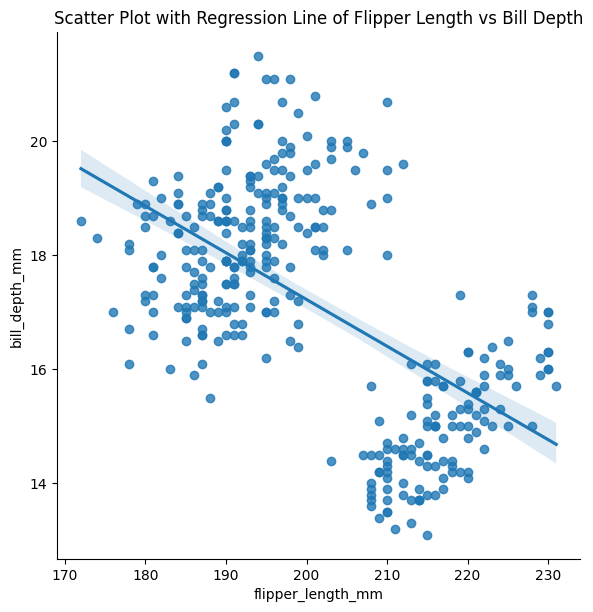

In [88]:
from palmerpenguins import load_penguins
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
penguins = load_penguins()

# Correlation

correlation = penguins['flipper_length_mm'].corr(penguins['bill_depth_mm']).round(2)
print(f"Correlation Coefficient: {correlation}")

# Plot Correclation 

plt.figure(figsize=(8,6))
plt.scatter(penguins['flipper_length_mm'],penguins['bill_depth_mm'])
plt.title('Flipper Length Vs Bill Depth')
plt.xlabel('Flipper Length')
plt.ylabel('Bill Depth')
plt.show()

# Plot with Regression Line 
# Seaborn scatter plot with regression line
sns.lmplot(x='flipper_length_mm', y='bill_depth_mm', data=penguins, height=6)
plt.title('Scatter Plot with Regression Line of Flipper Length vs Bill Depth')
plt.show()

Analysis earlier in the notebook indicated that Chinstrap's Bill Length and Bill Depth could potentially have a strong correlation. 
It is very interesting to see below that when it comes to Chinstrap, Bill Length has a strong positive relationship (0.7) whereas with the Adelie and Gentoo the relationship is moderately negative (-0.5)

In [116]:
from palmerpenguins import load_penguins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = load_penguins()

# Filter dataframe to only include Chinstrap
chinstrap_data = penguins[penguins['species'] == 'Chinstrap']

correlation = chinstrap_data['bill_depth_mm'].corr(chinstrap_data['bill_length_mm']).round(1)

# Filter dataframe to exlude Chinstrap
exl_chinstrap = penguins[penguins['species'] != 'Chinstrap']

correlation_2 = exl_chinstrap['bill_depth_mm'].corr(exl_chinstrap['bill_length_mm']).round(1)

print(f"Chinstraps Correlation: {correlation} \nAdelie & Gentoo Correlation: {correlation_2}")

Chinstraps Correlation: 0.7 
Adelie & Gentoo Correlation: -0.5
